Pontuação R², o coeficiente de determinação

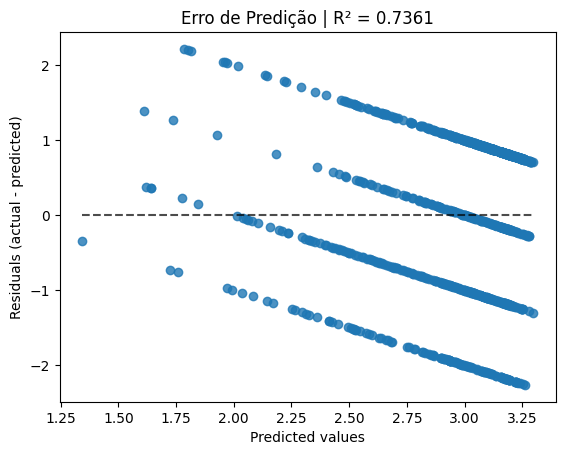

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, PredictionErrorDisplay

df = pd.read_excel("german_transformado.xlsx")
X = df[["Valor_credito"]]
y = df["Taxa_parcelamento"]

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)

disp = PredictionErrorDisplay.from_predictions(y_true=y, y_pred=y_pred)
plt.title(f"Erro de Predição | R² = {r2*10:.4f}")
plt.show()


Erro Absoluto Médio

In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

df = pd.read_excel("german_transformado.xlsx")

X = df[["Valor_credito"]]
y = df["Taxa_parcelamento"]

modelo = LinearRegression().fit(X, y)

y_pred = modelo.predict(X)
mae = mean_absolute_error(y, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae:.2f}")


Erro Absoluto Médio (MAE): 0.94


Erro quadratico Médio

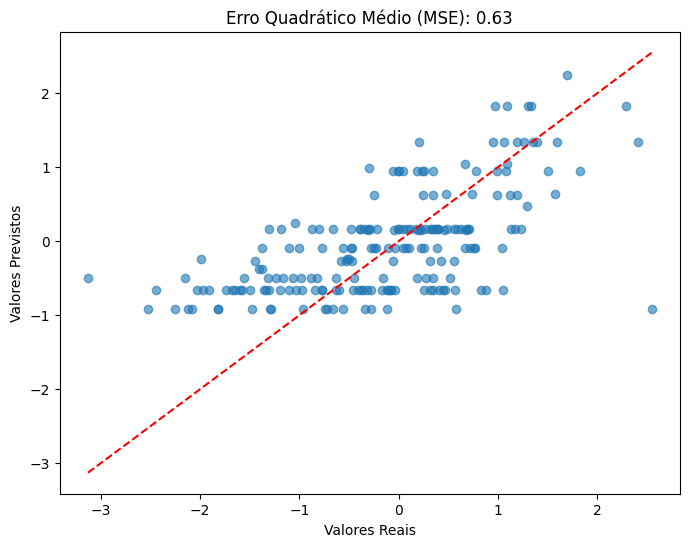

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import quantile_transform

df = pd.read_excel("german_transformado.xlsx")

colunas_numericas = ["Duracao_meses", "Valor_credito"]

X = df[["Duracao_meses"]] 
y = df["Valor_credito"]    

y_trans = quantile_transform(
    y.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(n_estimators=100, random_state=42)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(8, 6))

# Scatter plot dos valores reais vs previstos
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f"Erro Quadrático Médio (MSE): {mse:.2f}")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.show()



Erros de Forma geral

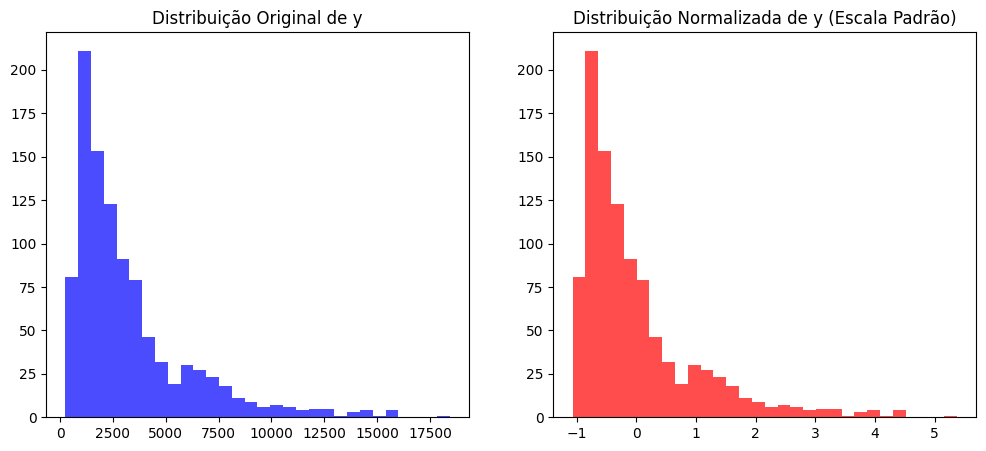

Erro Quadrático Médio (MSE): 0.49
Erro Percentual Absoluto Médio (MAPE): 1.54
Erro Absoluto Mediano (MedAE): 0.35
Erro Máximo (Max Error): 4.65
Perda de Pinball (tau=0.5): 0.24


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, median_absolute_error, max_error

def pinball_loss(y_true, y_pred, tau=0.5):
    residual = y_true - y_pred
    loss = np.where(residual >= 0, tau * residual, (tau - 1) * residual)
    return np.mean(loss)

df = pd.read_excel("german_transformado.xlsx")

X = df[["Duracao_meses"]]
y = df["Valor_credito"]

scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(- 1, 1)).squeeze()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, alpha=0.7, color="blue")
plt.title("Distribuição Original de y")
plt.subplot(1, 2, 2)
plt.hist(y_scaled, bins=30, alpha=0.7, color="red")
plt.title("Distribuição Normalizada de y (Escala Padrão)")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
pinball = pinball_loss(y_test, y_pred, tau=0.5)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Percentual Absoluto Médio (MAPE): {mape:.2f}")
print(f"Erro Absoluto Mediano (MedAE): {medae:.2f}")
print(f"Erro Máximo (Max Error): {max_err:.2f}")
print(f"Perda de Pinball (tau=0.5): {pinball:.2f}")



Pontuação e Variância

In [5]:
import pandas as pd
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_excel('german_transformado.xlsx')

X = df.drop(columns=['Valor_credito'])  
y = df['Valor_credito']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = explained_variance_score(y_test, y_pred)

print(f'Pontuação de Variância: {score:.4f}')


Pontuação de Variância: 0.5427


Desvios médios de Poisson, Gamma e Tweedie

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor, GammaRegressor, TweedieRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance

df = pd.read_excel("german_transformado.xlsx")

colunas_numericas = ["Duracao_meses", "Valor_credito"]

X = df[["Duracao_meses"]] 
y = df["Valor_credito"]    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poisson_model = PoissonRegressor(alpha=1.0, max_iter=500)
poisson_model.fit(X_train_scaled, y_train)
gamma_model = GammaRegressor(alpha=1.0, max_iter=500)
gamma_model.fit(X_train_scaled, y_train)

tweedie_model = TweedieRegressor(power=1.5, alpha=1.0, max_iter=500)
tweedie_model.fit(X_train_scaled, y_train)

y_pred_poisson = poisson_model.predict(X_test_scaled)
y_pred_gamma = gamma_model.predict(X_test_scaled)
y_pred_tweedie = tweedie_model.predict(X_test_scaled)

poisson_deviation = mean_poisson_deviance(y_test, y_pred_poisson)
gamma_deviation = mean_gamma_deviance(y_test, y_pred_gamma)
tweedie_deviation = mean_tweedie_deviance(y_test, y_pred_tweedie, power=1.5) 

print(f"Desvio Médio de Poisson: {poisson_deviation:.2f}")
print(f"Desvio Médio de Tweedie: {tweedie_deviation:.2f}")
print(f"Desvio Médio de Gamma: {gamma_deviation:.2f}")

Desvio Médio de Poisson: 1072.19
Desvio Médio de Tweedie: 19.18
Desvio Médio de Gamma: 0.42


Pontuação D²

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df = pd.read_excel("german_transformado.xlsx")

colunas_numericas = ["Duracao_meses", "Valor_credito"]

X = df[["Duracao_meses"]] 
y = df["Valor_credito"]    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
d2_score = r2_score(y_test, y_pred) 

print(f"Pontuação D² : {d2_score:.2f}")


Pontuação D² : 0.36


Modelos de Regressão

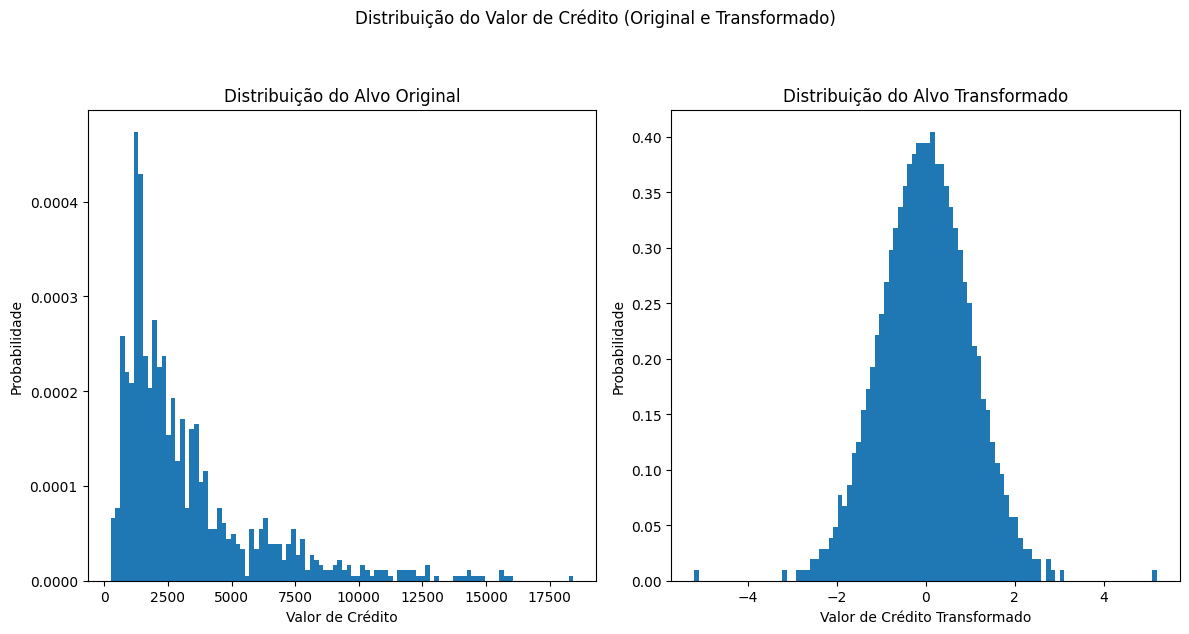

Erro Quadrático Médio (MSE): 0.63


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import quantile_transform
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_excel("german_transformado.xlsx")

colunas_numericas = ["Duracao_meses", "Valor_credito"]

X = df[["Duracao_meses"]] 
y = df["Valor_credito"]    

y_trans = quantile_transform(
    y.to_frame(), n_quantiles=900, output_distribution="normal", copy=True
).squeeze()

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

# Distribuição original do alvo
ax0.hist(y, bins=100, density=True)
ax0.set_ylabel("Probabilidade")
ax0.set_xlabel("Valor de Crédito")
ax0.set_title("Distribuição do Alvo Original")

# Distribuição transformada do alvo
ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probabilidade")
ax1.set_xlabel("Valor de Crédito Transformado")
ax1.set_title("Distribuição do Alvo Transformado")

f.suptitle("Distribuição do Valor de Crédito (Original e Transformado)", y=1.05)
plt.tight_layout()

plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2, random_state=42)

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
